In [7]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [2]:
ds0 = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mse06h/experiments/nic/sic/inference-validation/2023-02-01T06.240h.nc")
ds1 = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mse06h/experiments/latent-updates/fixed/inference-validation/2023-02-01T06.240h.nc")

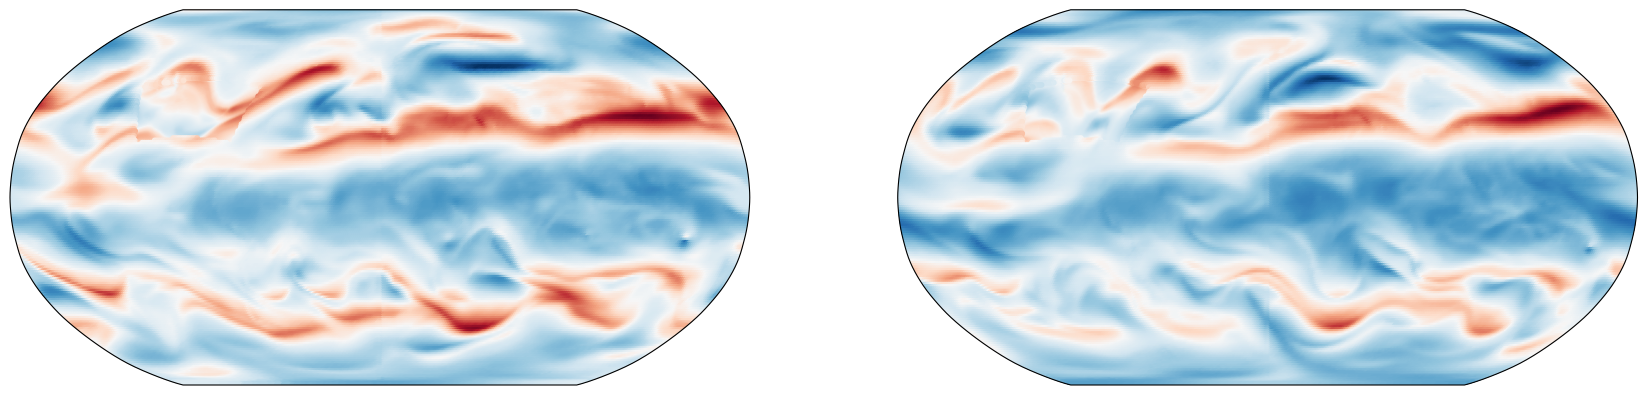

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(3*7,3*10), subplot_kw={"projection": ccrs.Robinson()})

for xds, ax in zip([ds0, ds1], axs):
    plotme = xds["u_250"]
    plotme = plotme.isel(time=-1)# - plotme.isel(time=0)
    vmax = plotme.max().values
    vmin = plotme.min().values
    ax.scatter(
        xds.longitude,
        xds.latitude,
        c=plotme.values,
        s=10,
        transform=ccrs.PlateCarree(),
    #    vmax=vmax,
    #    vmin=vmin,
        cmap="RdBu_r",
    )

    #ax.axvline(
    #    3
    #)
    #ax.axvline(
    #    300,
    #)

In [ ]:
ax.axvline

In [15]:
old = np.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mesh-gen/incorrectly-ordered-csmswt-trim10/latentx2.spongex1.combined.sorted.npz")
new = np.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mesh-gen/csmswt-trim10/latentx2.spongex1.combined.sorted.npz")

In [17]:
old["lon"]

array([359., 359., 359., ...,   1.,   1.,   1.])

In [18]:
new["lon"]

array([  3., 359., 111., ...,  91., 249., 135.])

In [20]:
old["lat"]

array([-89., -71.,  33., ...,  55.,  -5., -89.])

In [19]:
new["lat"]

array([ 89.,  89.,  89., ..., -89., -89., -89.])

In [26]:
import torch

In [52]:
gold = torch.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mesh-gen/incorrectly-ordered-csmswt-trim10/graph.latentx2.spongex1.12knn_data.pt", weights_only=False, map_location="cpu")
gnew = torch.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/mesh-gen/csmswt-trim10/graph.latentx2.spongex1.12knn_data.pt", weights_only=False, map_location="cpu")

In [58]:
np.rad2deg(gold["hidden"]["x"])

tensor([[-89.0000, 359.0000],
        [-71.0000, 359.0000],
        [ 33.0000, 359.0000],
        ...,
        [ 55.0000,   1.0000],
        [ -5.0000,   1.0000],
        [-89.0000,   1.0000]])

In [61]:
np.rad2deg(gnew["hidden"]["x"])

tensor([[ 89.0000,   3.0000],
        [ 89.0000, 359.0000],
        [ 89.0000, 111.0000],
        ...,
        [-89.0000,  91.0000],
        [-89.0000, 249.0000],
        [-89.0000, 135.0000]])

In [63]:
np.rad2deg(gnew["data"]["x"])

tensor([[ 22.7961, 238.2964],
        [ 22.8299, 238.4328],
        [ 22.8635, 238.5693],
        ...,
        [-89.5000, 357.5000],
        [-89.5000, 358.5000],
        [-89.5000, 359.5000]])